# CSE 252B: Computer Vision II, Winter 2019 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 20, 2019, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* Your code should be well written with sufficient comments to understand, but there is no need to write extra markdown to describe your solution if it is not explictly asked for.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* Your code and results should remain inline in the pdf (Do not move your code to an appendix).
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on Line Closest to the Origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (Hint: this calculation is needed in the
  two-view optimal triangulation method used below).

$\boldsymbol{l} = (a, b, c)^\top = (n^\top, c)^\top $ where $n$ is the norm vector to the line $\boldsymbol{l}$. And the homogenous 2d origin  is $(0,0,1)^\top$. Thus, the point on the $\boldsymbol{l}_{\perp}$ is $ (a,b,1)^\top$, where $\boldsymbol{l}_{\perp}$ is orthogonal to $\boldsymbol{l}$ and pass through the origin. 

$\boldsymbol{l}_{\perp} = (0,0,1)^\top * (a,b,1)^\top = (-b,a,0)^\top$

the point on $\boldsymbol{l}$ that is closest to the origin is the intersection of $\boldsymbol{l}_{\perp}$ and $\boldsymbol{l}$

x = $\boldsymbol{l}_{\perp} * \boldsymbol{l} = (-ac, -bc, a^2+b^2)^\top $ 


## Problem 2 (Programming): Feature Detection (20 points)
Download input data from the course website. The file IMG_5030.JPG
contains image 1 and the file IMG_5031.JPG contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features, where the detected features are indicated by a square window (the size of the detection window) about the features

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import convolve2d as conv2


def ImageGradient(I, w, t):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    #
    # outputs:
    # N is the 2x2xmxn gradient matrix
    # b in the 2x1xmxn vector used in the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    
    m,n = I.shape[:2]
    N = np.zeros((2,2,m,n))
    b = np.zeros((2,1,m,n))
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))
    
    """your code here"""
    #Compute gradient
    kernel_5pts = np.array([[-1,8,0,-8,1]]).T/12
    
    I_dx = conv2(I, kernel_5pts.T,mode = 'same')
    I_dy = conv2(I, kernel_5pts,mode = 'same')
    
    WTH = I.shape[1]
    LTH = I.shape[0]
    m = LTH
    n = WTH
    c_x = np.zeros(w)
    c_y = np.zeros(w)
    r = int(w/2)
    for i in range (r, WTH-r):
        for j in range (r, LTH-r):
            N[0,0,j,i] = (I_dx[j-r:j+r+1,i-r:i+r+1 ]**2).sum()#/(w**2)
            N[0,1,j,i] = (I_dx[j-r:j+r+1,
                               i-r:i+r+1 ]* I_dy[j-r:j+r+1,
                                               i-r:i+r+1]).sum()#/(w**2)
            N[1,0,j,i] = N[0,1,j,i]
            N[1,1,j,i] = (I_dy[j-r:j+r+1,
                               i-r:i+r+1 ]**2).sum()#/(w**2)
            
        
            c_x = np.array([np.arange(i-r , i+r+1),]*w)
            c_y = np.array([np.arange(j-r , j+r+1),]*w).T
            
            b[0,0,j,i] = (c_x*I_dx[j-r:j+r+1,
                                  i-r:i+r+1 ]**2).sum() + (c_y * (I_dx[j-r:j+r+1,
                                                             i-r:i+r+1 ]* I_dy[j-r:j+r+1,i-r:i+r+1 ])).sum()
            
            
            b[1,0,j,i] = (c_y*I_dy[j-r:j+r+1,
                                  i-r:i+r+1]**2).sum() + (c_x * (I_dx[j-r:j+r+1,
                                                                 i-r:i+r+1 ]* I_dy[j-r:j+r+1,
                                                                                     i-r:i+r+1 ])).sum()
            
            
            #J0 before threshold, J1 after threshod 
            J0[j,i] = (np.trace(N[:,:,j,i]/(w**2))- np.sqrt(np.around(np.trace(N[:,:,j,i]/(w**2))**2,9)
                                                     -np.around(4*np.linalg.det(N[:,:,j,i]/(w**2)),9)))/2
    
    
    J1 = J0.copy()
    
    for i in range (WTH):
        for j in range (LTH):
            if J1[j,i] < t: 
                J1[j,i] = 0    
    
    return N, b, J0, J1

  
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w
    # For any window in J, the result should only contain 1 nonzero value
    # In the case of multiple identical maxima in the same window,
    # the tie may be broken arbitrarily
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    J2 = J.copy()
    """your code here"""
    WTH = J.shape[1]
    LTH = J.shape[0]
    r = int(w_nms/2)
    
    J2 = J.copy()
    """your code here"""
    r = int(w/2)
    pos = []
    for i in range (r,WTH-r):
        for j in range (r, LTH-r):
            local_max = J[j-r:j+r+1,i-r:i+r+1].max()
            if local_max > J2[j,i]:
                J2[j,i] = 0    
    
    return J2
  
# 
def ForstnerCornerDetector(J, N, b):
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # J is the NMS image
    # N is the 2x2xmxn gradient matrix
    # b is the 2x1xmxn vector computed in the image_gradient function
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC list of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    
    """your code here"""
    WTH = J.shape[1]
    LTH = J.shape[0]
    pos = []
    for j in range (J.shape[0]):
        for i in range (J.shape[1]):
            if J[j,i] != 0:
                pos.append([j,i])
    
    pos_np = np.array(pos)
    
    C = pos_np.shape[0]
    pts = np.zeros((2,C))
    
    
    
    for k, (j, i) in enumerate(zip (pos_np[:,0],pos_np[:,1])): 
        if np.linalg.det(N[:,:,j,i]) != 0 :
                pts[:,k] = np.dot(np.linalg.inv(N[:,:,j,i]),b[:,:,j,i]).reshape(-1)
          
        else :
                #b[:,:,j,i] = np.matrix(b[:,:,j,i])
                pts[:,k] = np.dot(np.linalg.pinv(N[:,:,j,i]) ,b[:,:,j,i]).reshape(-1)
    
    
    
    
    
    return C, pts


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    N, b, J0, J1 = ImageGradient(I, w, t)
    J2 = NMS(J1, w_nms)
    C, pts = ForstnerCornerDetector(J2, N, b)
    return C, pts, J0, J1, J2

def grayscale(img):
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140
    return gray

took 246.445750 secs


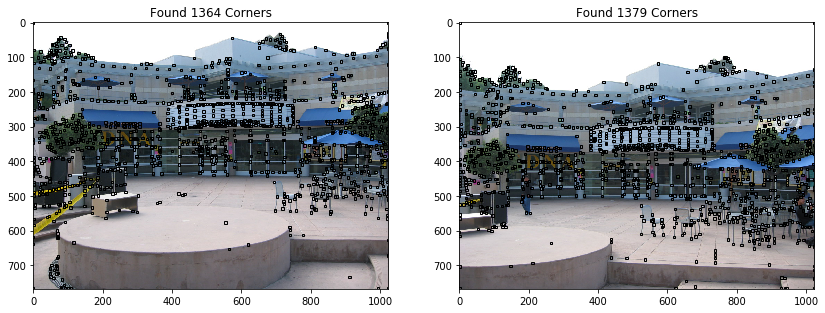

In [2]:
from PIL import Image
import time

# input images
I1 = np.array(Image.open('IMG_5030.JPG'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.JPG'), dtype='float')/255.

I1_gray = grayscale(I1)
I2_gray = grayscale(I2)

# parameters to tune
w = 7
t1 = 1.2*10**-3
t2 = 1.1*10**-3
w_nms = 7

tic = time.time()

# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1_gray, w, t1, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2_gray, w, t2, w_nms)
toc = time.time() - tic

print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('Found %d Corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('Found %d Corners'%C2)

plt.show()

#### Final values for parameters
* w = 7
* t = 1.2*10**-3  
* t = 1.1*10**-3 
* w_nms = 7
* C1 = 1364
* C2 = 1379

## Problem 3 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 300 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features are indicated by a square window (the size of the matching window) about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

In [3]:
def NCC(img1, img2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    pts1_n = pts1.shape[1]
    pts2_n = pts2.shape[1]
    scores = np.zeros((pts1_n,pts2_n))
    R = int(w/2)
    pts1_int = pts1.astype(int)
    pts2_int = pts2.astype(int)
    k = 0
    p_xr = int(p[1]/2)
    p_yr = int (p[0]/2)
    for j in range (pts1_n):
        x_1,y_1 = pts1_int[:,j]
        if R < x_1 < (int(img1.shape[1])-R) and R< y_1 < (int(img1.shape[0])-R):
            for i in range (pts2_n):
                x_2,y_2 = pts2_int[:,i]
                if R < x_2 < (int(img2.shape[1])-R) and R < y_2 < (int(img2.shape[0])-R) and x_1-p_xr < x_2 < x_1+p_xr and y_1-p_yr < y_2 < y_1+p_yr:
                    W1 = img1[y_1-R:y_1+R+1,x_1-R:x_1+R+1]
                    W2 = img2[y_2-R:y_2+R+1,x_2-R:x_2+R+1]
                    W1_mean = np.mean(W1)
                    W2_mean = np.mean(W2)
                    W1_num = W1 - W1_mean
                    W2_num = W2 - W2_mean
                    W1_tilde = W1_num/np.linalg.norm(W1_num)
                    W2_tilde = W2_num/np.linalg.norm(W2_num)
                    scores[j,i] = np.sum(W1_tilde*W2_tilde)
                    #print([j,i])
    return scores


def Match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # list of the feature coordinates in image 1 and image 2 
    
    """your code here"""
    for i in range (scores.shape[0]):
        for j in range (scores.shape[1]):
            if scores[i,j] < t:
                scores[i,j] = -1
    
    mask = (scores < 100)
    inds = np.zeros((2,300))
    #scores_copy = scores.copy()
    WTH = scores.shape[1]
    LTH = scores.shape[0]
    j = 0 
    i = 0
    while True:
        if scores[mask].shape == (0,) :
            print('Not enough 300 matching points')
            break
        scores_copy = scores[mask].reshape((LTH-j,WTH-j))
        
        first_maximum = scores_copy.max()
        max_pos_copy = np.where(scores_copy == first_maximum)
        scores_copy[max_pos_copy] = -1
        next_maximum = max(scores_copy[max_pos_copy[0],:].max(),scores_copy[:,max_pos_copy[1]].max())
        max_pos = np.where(scores == first_maximum)
        if (1-first_maximum) < (1- next_maximum)*d:
            inds[0,i] = max_pos[0]
            inds[1,i] = max_pos[1]
            i += 1
            if i == 300:
                break
        mask[max_pos[0],:] = False
        mask[:,max_pos[1]] = False
        j += 1
        

            #print(j)
    inds = inds.astype(int)
    
    return inds



def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w, p)
    inds = Match(scores, t, d) 
    return inds




took 24.233715 secs


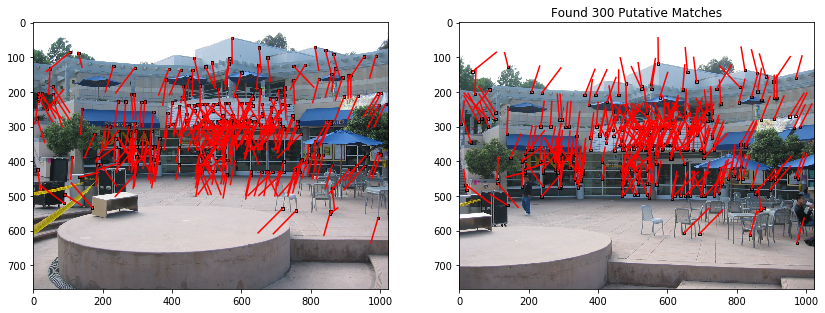

unique points in image 1: 300
unique points in image 2: 300


In [4]:
# parameters to tune
w = 7
t = 0.8
d = 0.9
p = np.array([150,150]) #start with Y 

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
match1 = pts1[:,inds[0,:]]
match2 = pts2[:,inds[1,:]]

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('Found %d Putative Matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

In [231]:
np.save('../match1.npy', match1)
np.save('../match2.npy', match2)

#### Final values for parameters
* w = 7
* t = 0.8
* d = 0.9
* p = np.array([200,150])
* num_matches = 300

## Problem 4 (Programming): Outlier Rejection (20 points)
  
  The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 7-point algorithm (as described in
lecture) to estimate the fundamental matrix, resulting in 1 or 3 solutions. Calculate 
the (squared) Sampson error as a first order approximation to the geometric error.

Hint: this problem has codimension 1

## Also: fix a random seed in your MSAC. If I cannot reproduce your results, you will lose points.

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 * random seed
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

In [239]:
import sympy as sp
def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]
def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    """your code here"""
    dimension = pts.shape[0]
    variance = np.var(pts,axis = 1)
    mean = np.mean(pts,axis = 1)
    var_tol = variance.sum()
    S = np.sqrt(dimension/var_tol)
    T = np.eye(pts.shape[0]+1)
    T[:dimension, :dimension] = S* np.eye(dimension)
    for i in range (dimension) :
        T[i,-1] = -S*mean[i]
    pts_homo = Homogenize(pts)
    pts = T @ pts_homo  #home - W scale 
    #pts = Dehomogenize(pts_normalized)   #inhomi - W/O scale 
    
    return pts, T


In [287]:
def seven_pts_estF(x1,x2):
    #  estimate the Fundamental matrix from the 2D pts in image 1 to the 2D pts in image 2 with 7 randomly chosen 2d inhomo pts
    # inputs: 
    #     x1 - 7 2d inhomo pts vertical stacked from image 1
    #     x2 - 7 2d inhomo pts vertical stacked from image 2
    # outputs:
    #     F - Fundamental matrix from img1 to img2 3*3 (x2.T @ F @ x1 = 0 )
    #   use H12 to est sampson error 
    
    F = np.zeros((3,3))
        
    # data normalization
    x1, T1 = Normalize(x1)
    x2, T2 = Normalize(x2)

    
    A = np.zeros((x1.shape[1],9))
    for i in range (x1.shape[1]):

        A[i,:] = np.kron(x2[:,i].T,x1[:,i].T)
    
    u,s,vh = np.linalg.svd(A)
    F2 = vh[-1,:]
    F1 = vh[-2,:]
    
    # per rows 
    F1 = F1.reshape(3,3)     
    F2 = F2.reshape(3,3)
    alpha_sp = sp.Symbol('alpha_sp')
    F_sp = sp.Matrix(alpha_sp * F1 + F2)
    coeff = F_sp.det().as_poly().coeffs()
    
    root = np.roots(coeff)
    real_values = root[np.isreal(root)]
    
    if real_values.size != 0:
        alpha = real_values.real[abs(real_values.imag)<1e-5]   #real_flt64 

        if alpha.size != 1: 
            F = np.zeros((alpha.shape[0],3,3))
            F_DLT = np.zeros((alpha.shape[0],3,3))
            for i in range (alpha.shape[0]):
                F[i] = alpha[i] * F1 +F2 
                F_DLT[i] = (T2.T @ F[i] @ T1)
        else:
            F = alpha * F1 +F2  
            F_DLT = (T2.T @ F @ T1)

    return F_DLT 
    

In [293]:
def sampson_error(x1,x2, F):
    # Calculate the (squared) Sampson error as a first order approximation to the geometric error
    # inputs:
    #    x1,x2: SINGLE 2d inhomo (2*1) corresponding pts from WHOLE datapts (no need to be one of the 4 pts used to est H before)
    #    H: Planar projection matrix map x1 to x2 (x1 --> x2)
    #    epsilon: residual error ah   2*1 
    #    J: 2*4 
    # output:
    #    sqaured sampson error 
    #    cor_x: two 2d inhomo correspoding pts vertical stacked after sampson correction
    epsilon = (x1[0,0]*x2[0,0]*F[0,0] + x1[0,0]*x2[1,0]*F[1,0] + x1[0,0]*F[2,0] + x1[1,0]*x2[0,0]*F[0,1] 
               + x1[1,0]*x2[1,0]*F[1,1] + x1[1,0]*F[2,1] + x2[0,0]*F[0,2] +x2[1,0]*F[1,2] +F[2,2])
    #A = np.kron(Homogenize(x2).T,Homogenize(x1).T)
    #epsilon = A @ F.reshape(-1,1)
    
    #print('epsilon:   ',epsilon)
    #epsilon = x2.T @ F @ x1
    J = np.zeros((1,4))
    
    J[0,0] = x2[0,0] * F[0,0] + x2[1,0] * F[1,0] + F[2,0]
    J[0,1] = x2[0,0] * F[0,1] + x2[1,0] * F[1,1] + F[2,1]
    J[0,2] = x1[0,0] * F[0,0] + x1[1,0] * F[0,1] + F[0,2]
    J[0,3] = x1[0,0] * F[1,0] + x1[1,0] * F[1,1] + F[1,2]
    
    #print('J:    ',J)
    lamb = - epsilon / (J @ J.T ) 
    error = J.T @ lamb
    cor_x = np.vstack((x1,x2)) + error
    sqr_error = error.T @ error
    #sqr_error = np.linalg.norm(error)**2 
    #sqr_error = epsilon.T * np.linalg.inv((J @ J.T)) * epsilon 
    
    return sqr_error, cor_x
    

In [294]:
def Rej_outlier(match1,match2,H,tol):
    # reject outlier with sampson error 
    # if the sampson error is greater than the tol, then that pair of pt will be regard as outlier. vice versa
    # inputs:
    #   match1,match2 : 2d inhomo matched features coordinates 
    #   tolerance 
    # outputs:
    #   N : number of inliers 
    #   inliers: inlier index of matched pts 
    #   cost 
    cost = 0
    inliers = []
    for i in range (match1.shape[1]):
        error,_ = sampson_error(match1[:,i].reshape(-1,1),match2[:,i].reshape(-1,1), H)
        if error < tol :
            cost += error 
            inliers.append(i)
        else:
            cost += tol 
    N = len(inliers)
    return inliers, cost ,N

In [316]:
from scipy.stats import chi2
from math import log

def MSAC(match1, match2, thresh, tol, p):
    # Inputs:
    #    match1 - matched feature correspondences in image 1
    #    match2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #    s - sample size for estimating max trail 
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - planar projective transformation matrix H
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
    trials = 0
    s = 7
    max_trials = np.inf
    
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    
    while (trials < max_trials) and (consensus_min_cost > thresh):
        
    # consensus_min_cost_model --- camera projection matrix P
        np.random.seed(trials)
        idx = np.random.choice(match1.shape[1], size = 7, replace = False)  
        #idx = [230 ,294 ,211, 142,  39, 245,  40]
        x1_7pts = match1[:,idx]     
        x2_7pts = match2[:,idx]
        
        
        F = seven_pts_estF(x1_7pts,x2_7pts) # 3 possiblilities    0, F(3,3), F (3,3,3)
        #print('F:     ',F)
        
        
        if F.all() == 0:
            cost = np.inf
        else:
            if F.size == 27:     # F = 3*3*3 
                for i in range (F.shape[0]):
                    inliers,  cost, N = Rej_outlier(match1,match2,F[i],tol)
                    if cost < consensus_min_cost:
                        consensus_min_cost = cost
                        consensus_min_cost_model = F[i]
                        global_inliers = inliers
                        w = N / match1.shape[1]
                        final_idnx = idx
                        max_trials = log(1-p)/log(1-w**s) 
                        
                        
            elif F.size == 9:   # F = 3*3 
                inliers,cost, N = Rej_outlier(match1,match2,F,tol)                
                if cost < consensus_min_cost:
                    consensus_min_cost = cost
                    consensus_min_cost_model = F
                    global_inliers = inliers
                    w = N / match1.shape[1]
                    final_idnx = idx
                    max_trials = log(1-p)/log(1-w**s) 
                    

            
        trials += 1     
    
    
    
    
    return consensus_min_cost, consensus_min_cost_model, global_inliers, trials,final_idnx


# MSAC parameters 
alpha = 0.95   #
df = 1 
tol =  chi2.ppf(alpha,df) 
thresh = 0
p = 0.99  # probability that as least one of the random samples does not contain any outliers  

tic=time.time()

cost_MSAC, F_MSAC, inliers, trials,final_idnx = MSAC(match1, match2, thresh, tol, p)

# choose just the inliers
new_match1 = match1[:,inliers]
new_match2 = match2[:,inliers]
outliers = np.setdiff1d(np.arange(match1.shape[1]),inliers)

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
print('F_MSAC = ')
print(F_MSAC)


took 1.609480 secs
32 iterations
inlier count:  226
inliers:  [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 20, 21, 22, 23, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 78, 79, 82, 83, 84, 87, 88, 89, 90, 92, 94, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 141, 142, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 159, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 175, 176, 177, 181, 182, 183, 184, 186, 187, 188, 189, 192, 193, 194, 195, 197, 198, 200, 201, 203, 204, 205, 207, 208, 210, 211, 213, 215, 217, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 259, 261, 26

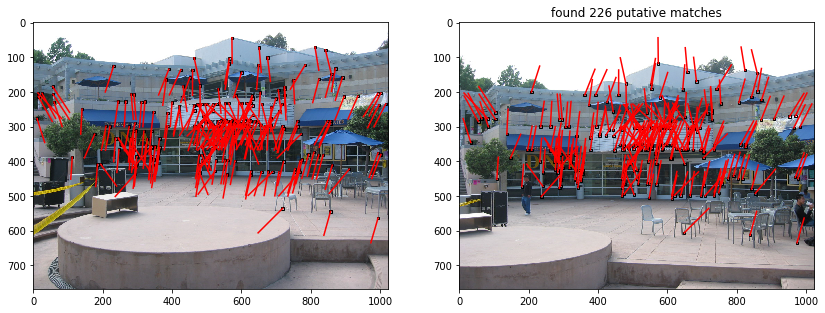

unique points in image 1: 226
unique points in image 2: 226


In [317]:
# display the figures
"""your code here"""
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('found %d putative matches'%new_match1.shape[1])
for i in range(new_match1.shape[1]):
    x1,y1 = new_match1[:,i]
    x2,y2 = new_match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%len(inliers))
print('unique points in image 2: %d'%len(inliers))

#### Final values for parameters
* random seed = 31
* $p$ = 0.99
* $\alpha$ = 0.95 
* tolerance = 3.8414588206941236
* threshold = 0
* num_inliers = 226
* num_attempts = 32
* consensus_min_cost = 431.134208340

## Problem 5 (Programming): Linear Estimation of the Fundamental Matrix (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [319]:
np.save('../new_match1.npy',new_match1)
np.save('../new_match2.npy',new_match2)



In [318]:
def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    F = np.eye(3,3)
        
    # data normalization
    if normalize:
        x1, T1 = Normalize(x1)
        x2, T2 = Normalize(x2)
    else:
        x1 = Homogenize(x1)
        x2 = Homogenize(x2)
    
    A = np.zeros((x1.shape[1],9))
    for i in range (x1.shape[1]):

        A[i,:] = np.kron(x2[:,i].T,x1[:,i].T)
    
    u,s,vh = np.linalg.svd(A)
    F = vh[-1,:]
    # per rows 
    F = F.reshape(3,3)     
    
    U,D,VH = np.linalg.svd(F)
    
    D[-1] = 0
    
    F = U @ np.diag(D) @ VH
    # data denormalize
    if normalize:
        F_DLT = (T2.T @ F @ T1)
        F_DLT = F_DLT/np.linalg.norm(F_DLT)
        
    return F_DLT


# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
F_DLT = DLT(new_match1, new_match2, normalize=True)
time_total=time.time()-time_start

# display the resulting F_DLT, scaled with its frobenius norm
print('F_DLT =')
print(F_DLT)

DLT with Data Normalization
F_DLT =
[[-1.25702811e-08  4.76032694e-08  1.55694055e-04]
 [-8.93232323e-07 -3.04249784e-08  1.14987701e-02]
 [ 1.85037902e-04 -1.08308794e-02 -9.99875198e-01]]


## Problem 6 (Programming): Nonlinear Estimation of the Fundamental Matrix (70 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors
  (see section A6.9.2 (page 624) of the textbook, and the corrections
  and errata).
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the fundamental matrix $\boldsymbol{F}_\text{LM}$, scaled
  such that $||\boldsymbol{F}_\text{LM}||_\text{Fro} = 1$.

#### No need for data normalization 

In [301]:
def skew(w):
    # Returns the skew-symmetrix represenation of a vector
    """your code here"""
    w_skew = np.zeros((3,3))
    w_skew = np.array([[0,-w[2],w[1]],[w[2],0,-w[0]],[-w[1],w[0],0]])
    
    
    return w_skew

In [302]:
def F2P(F):
    # Calculate projection matrix P2 from Fundamental matrix if P1 is a canonical camera P1 = [I|0] 
    #inputs: 
    #     F - Fundamental matrix 3*3
    #     e_prm - epipoles in second frame 
    #outputs:
    #     P_prm - second camera projection matrix  with a canonical camera 
    u,s,vt = np.linalg.svd(F.T)
    e_prm = vt[-1,:]
    P_prm = np.zeros((3,4))
    
    U,D,VH = np.linalg.svd(F)
    D_prm = np.diag((D[0],D[1],(D[0]+D[1])/2))
    W = np.array([[0,1,0],[-1,0,0],[0,0,0]])
    Z = np.array([[0,-1,0],[1,0,0],[0,0,1]])
    M = U @ Z @ D_prm @ VH
    
    ################ Not using S but e', Don't know if theyre the same ####################
    
    P_prm[0:3,0:3] = M
    e = -U[:,-1]
    
    P_prm[:,-1] = e

    
    return P_prm

In [303]:
def square_dist(a,b,c,d,f1,f2,t):
    #cost function used for optimal triangulation 
    s = t**2/(1+f1**2*t**2) + (c*t + d)**2/((a*t+b)**2 + f2**2*(c*t+d)**2)
    return s 

In [304]:
def close_pt_origin(l1):
    # input:
    #    l1 - 2d line 
    #output:
    #    x : 2d homo pt lied on line l1 that is closest to origin 
    x = np.zeros((3,1))
    x[0] = -l1[0] * l1[2]
    x[1] = -l1[1] * l1[2]
    x[2] = l1[0]**2 + l1[1]**2 
    return x

In [305]:
def orthogonal_Line(l1,x1):
    #compute orthogonal line of l1 which pass through x1
    #l1: 2d homo line 3*1  (a,b,c)
    #x1: 2d homo pt 3*1   (x,y,w)
    l_perp = np.array([[-l1[1,0]*x1[2,0]],
                       [l1[0,0]*x1[2,0]],
                       [l1[1,0]*x1[0,0]-l1[0,0]*x1[1,0]]])
    return l_perp

In [306]:
def ray_plane_X(x1_homo,x2_homo,F,p1,p2):
    #Compute 3D pts in world frame with ray plane intersection method 
    #inputs:
    #   x1_homo/x2_homo - two 2d corresponding HOMO pts in image 1,2 respectively after epipolar line constrain 
    #   p1,p2 - projection matrix  3*4
    #outputs:
    #   X - 3d HOMO !!!!  pts in world frame with two 2d corresponding pts 
    
    l_prm = F @ x1_homo    # (3*1)
    l_perp = orthogonal_Line(l_prm, x2_homo)  #3*1
    plane_p = p2.T @ l_perp     #4*1 
    u,d,v = np.linalg.svd(p1)
    cc = v[-1,:].reshape(-1,1)  #4*1    Camera center 
    X_back_proj = p1.T @ np.linalg.inv(p1 @ p1.T) @ x1_homo  #4*1 back proj to 3D
    l_3D = cc @ X_back_proj.T - X_back_proj @ cc.T    #4*4
    X = l_3D @ plane_p
    #X = Dehomogenize(X)
    
    return X

In [307]:
def get3dpoints(x1,x2,F):
    P,Pp = getP(F)
    x1_c,x2_c = correctpoints(x1,x2,F)
    lp = F @ x1_c
    lp_ortho = np.zeros(lp.shape)
    X = np.zeros((3,x1.shape[1]))
    for i in range(x1.shape[1]):
        ap = lp[0,i]
        bp = lp[1,i]
        cp = lp[2,i]
        xp = x2_c[0,i]
        yp = x2_c[1,i]
        wp = x2_c[2,i]
        lp_ortho[:,i] = np.array([-bp*wp, ap*wp, bp*xp - ap*yp])
        plane = Pp.T @ lp_ortho[:,i].reshape(-1,1)
        n = plane[:3].reshape(-1,1)
        d = plane[3]
        Xtem = d*x1_c[:,i].reshape(-1,1)
        Xtem = np.vstack((Xtem, - n.T @ x1_c[:,i].reshape(-1,1)))
        X[:,i] = Parameterize(Xtem)[:,0]
    return X,Xtem

In [320]:
def Optimal_3D_estimate(x1,x2,F,p1,p2):
    # estimate 3D pt with two 2d inhomo corresponding pt 
    # input: x1,x2 inhomo 2d corresponding pts in img1 and img2 respectively 
    #        p1,p2 proj matrix in img1 and img2 respectively 
    #        F - fundamental matrix 
    # output: X inhomo 3d pt
    # NO NEED FOR DATA NORMALIZATION
    T1 = np.array([[1,0,-x1[0]],[0,1,-x1[1]],[0,0,1]])
    T2 = np.array([[1,0,-x2[0]],[0,1,-x2[1]],[0,0,1]])
    F_trsl = np.linalg.inv(T2).T @ F @ np.linalg.inv(T1)
    u,d,vh = np.linalg.svd(F_trsl)
    e1 = vh[-1,:]*np.sign(vh[-1,-1])
    e2 = u[:,-1]*np.sign(u[-1,-1])
    scale1 = 1/np.sqrt(e1[0]**2 + e1[1]**2)
    scale2 = 1/np.sqrt(e2[0]**2 + e2[1]**2)
    e1 = scale1 * e1
    e2 = scale2 * e2
    R1 = np.array([[e1[0],e1[1],0],[-e1[1],e1[0],0],[0,0,1]])
    R2 = np.array([[e2[0],e2[1],0],[-e2[1],e2[0],0],[0,0,1]])
    F_rot = R2 @ F_trsl @ R1.T
    f1 = e1[2]
    f2 = e2[2]
    a = F_rot[1,1]
    b = F_rot[1,2]
    c = F_rot[2,1]
    d = F_rot[2,2]
    Coeff6 = -a*c*f1**4*(a*d - b*c)
    Coeff5 = (a**2 + c**2*f2**2)**2 - a*d*f1**4*(a*d - b*c) - b*c*f1**4*(a*d - b*c)
    Coeff4 = 2*(a**2 + c**2*f2**2)*(2*c*d*f2**2 + 2*a*b) - 2*a*c*f1**2*(a*d - b*c) - b*d*f1**4*(a*d - b*c)
    Coeff3 = 2*(a**2 + c**2*f2**2)*(b**2 + d**2*f2**2) + (2*c*d*f2**2 + 2*a*b)**2 - 2*a*d*f1**2*(a*d - b*c) - 2*b*c*f1**2*(a*d - b*c)
    Coeff2 = 2*(b**2 + d**2*f2**2)*(2*c*d*f2**2 + 2*a*b) - a*c*(a*d - b*c) - 2*b*d*f1**2*(a*d - b*c)
    Coeff1 = (b**2 + d**2*f2**2)**2 - a*d*(a*d - b*c) - b*c*(a*d - b*c)
    Coeff0 = - b*d*(a*d - b*c)
    Coeff = [Coeff6,Coeff5,Coeff4,Coeff3,Coeff2,Coeff1,Coeff0]
    root = np.roots(Coeff)
    real_values = root[np.isreal(root)]
    cost = np.inf
    if real_values.size != 0:
        real_flt64 = real_values.real[abs(real_values.imag)<1e-5]   #real_flt64 
        for i in real_flt64:
            if cost > square_dist(a,b,c,d,f1,f2,i):
                cost = square_dist(a,b,c,d,f1,f2,i)
                #print('cost:   ',cost,'\n')
                t_min = i   
        l1 = np.array([t_min*f1, 1 , -t_min])
        l2 = np.array([-f2*(c*t_min+d), a*t_min+b, c*t_min+d])
        
        x1_homo = np.linalg.inv(T1) @ R1.T @ close_pt_origin(l1)
        x2_homo = np.linalg.inv(T2) @ R2.T @ close_pt_origin(l2)
        x1_new  = Dehomogenize(x1_homo)
        x2_new = Dehomogenize(x2_homo)
        #print('x2_homo.shape:     ',x2_homo.shape)
        #################     Compute 3D X  with ray plane intersection method  #######################
        X = ray_plane_X(x1_homo,x2_homo,F, p1,p2)
        
    else:
        print('Zero real roots')
        X = None
        x1_new = None 
        x2_new = None
        
        
        
    return X,x1_new,x2_new

In [321]:
from numpy import sin, cos , pi
from math import ceil 
def Sinc(x):
    # Returns a scalar valued sinc value
    """your code here"""
    if x == 0:
        y = 1
    else:
        y = sin(x)/x

    return y


def Parameterize(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful
    return ParameterizeHomog(P.reshape(-1,1))


def Deparameterize(p):
    # Deparameterize all optimization variables
    return DeParameterizeHomog(p).reshape(3,4)


def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization
    """your code here"""
    a = V[0]
    b = V[1:]
    v_hat = (2 * b)/Sinc(np.arccos(a))
    
    v_norm = np.linalg.norm(v_hat)
    if v_norm >= pi:
        v_hat = (1 - (2*pi/v_norm)*ceil((v_norm-pi)/(2*pi)))* v_hat
        #print(np.linalg.norm(v_hat)-pi )

    return v_hat


def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterization 11*1 --> 12*1
    """your code here"""
    v_bar = np.zeros((v.shape[0]+1,1))
    v_bar[0] = cos(np.linalg.norm(v)/2)
    v_bar[1:] = Sinc(np.linalg.norm(v)/2)/2 * v
    return v_bar

    
def ComputeCost(x1, x2,x1_predict,x2_predict):
    # Inputs:
    #    x1,x2 - 2D inhomogeneous image points NOT Normalized 
    #  
    #    P - projection matrix
    # Output:
    #    cost - Total reprojection error
    """your code here"""
    
    
    cost = ((x2 - x2_predict)**2).sum() + ((x1- x1_predict)**2).sum()
    return cost

In [322]:
def Jacobian(P,p,Xhomo, Xin,H2X = True):
    # compute the jacobian matrix
    #
    # Input:
    #    P - 3x4 camera projection matrix   (H)
    #    p - 11x1 homogeneous parameterization of P   (h)
    #    Xhomo - 3d homo pts in world frame comes from optimal triangulation --> Para --> depara
    #    Xin   - 3d inhomo pts in world frame comes from optimal triangulation --> Para
    #    x1homo - homo sampson 2d pts       3*N
    #    x1 - Normalized 2d inhomo After the following process Sampson Corrected --> Homo   --> para  2*n
    #    H --- x1homo --- Xhomo
    #    h --- x1 --- Xin
    
    
    #    H2X(True) : x2 = J @ H    or   x = J @ P  
    #    H2X(False) : x2 = J @ x1   or x = J @ X ,where x2 = H @ x1   x = P @ X
    # Output:
    #    J - 2nx8 jacobian matrix
    
    #J = np.zeros((2*x1.shape[1],h.shape[0]))
    
    """your code here"""
    x_homo = P @ Xhomo  #x_estimate   
    
    
    
    if H2X:
        H_bar = P.reshape(-1,1)  #12*1

        b = H_bar[1:].reshape(-1,1)  #11*1
        a_diff = np.zeros((1,p.shape[0])) #1*8
        b_diff = np.eye(p.shape[0])/2
        n_p = np.linalg.norm(p)  #norm_p
        h_p = n_p/2              #half_norm_p
        diff_sinc = cos(h_p)/h_p - sin(h_p)/(h_p**2)
        if n_p != 0:
            a_diff = -b.T/2
            b_diff = Sinc(h_p)*np.eye(p.shape[0])/2 + (p @ p.T)*diff_sinc/(4*n_p)

        P_bar_over_p = np.vstack((a_diff,b_diff)) # H_bar.shape[0] * (H_bar.shape[0]-1)
        
        
    else:
        
        #    H --- x1homo --- Xhomo
        #    h --- x1 ---  Xin
        
        P_bar_over_p = np.zeros((4*Xhomo.shape[1],3)) #4n *3
        for i in range (Xhomo.shape[1]):
        
            H_bar = Xhomo[:,i].reshape(-1,1)
            
            p = Xin[:,i].reshape(-1,1)   
            
            b = H_bar[1:,0].reshape(-1,1)  #8*1
            a_diff = np.zeros((1,p.shape[0])) #1*8
            b_diff = np.eye(p.shape[0])/2
            n_p = np.linalg.norm(p)  #norm_p
            h_p = n_p/2              #half_norm_p
            diff_sinc = cos(h_p)/h_p - sin(h_p)/(h_p**2)
            if n_p != 0:
                a_diff = -b.T/2
                b_diff = Sinc(h_p)*np.eye(p.shape[0])/2 + (p @ p.T)*diff_sinc/(4*n_p)

            P_bar_over_p[4*i: 4*i+4,:] = np.vstack((a_diff,b_diff)) # 4n*3

            
            
    x_in = Dehomogenize(x_homo) #x inhomo 2*N
    w = x_homo[-1]    
    
    if H2X : 
        x_hat_over_P_bar = np.zeros((2*Xin.shape[1],p.shape[0]+1 )) #2n*12

        for i in range (Xhomo.shape[1]):
            left = np.vstack((Xhomo[:,i].reshape(-1,1).T,np.zeros([1,4])))
            mid = np.vstack((np.zeros([1,4]),Xhomo[:,i].reshape(-1,1).T))
            right = np.vstack((-x_in[0,i]*Xhomo[:,i].reshape(-1,1).T,-x_in[1,i]*Xhomo[:,i].reshape(-1,1).T))

            x_hat_over_P_bar[2*i:2*i+2,:] = (1/w[i])* np.hstack((left,mid,right))
        J = x_hat_over_P_bar @ P_bar_over_p
      
        
    else: 
        x_hat_over_P_bar = np.zeros((2*Xhomo.shape[1],Xhomo.shape[0])) # 2n*4 
        J = np.zeros((2*Xin.shape[1],3))
        for i in range (Xin.shape[1]):
            temp = (1/w[i]) * np.vstack((P[0,:] - x_in[0,i] * P[-1,:], P[1,:] - x_in[1,i] * P[-1,:]))
            
            #x_hat_over_P_bar[2*i:2*i+2,:] = (1/w[i])* temp
    
            J[2*i:2*i+2,:] =   temp @ P_bar_over_p[4*i: 4*i+4,:]    #2n*3
    
    
    return J

In [323]:
def normal_eq_parameters(A,B,B_prm,x1,lam,error1,error2):
    # Calculate the sigma_a ,sigma_b to correct Planar projection matrix H and sampson cprrected 2d inhomo pts respectively
    # 
    # inputs:
    #    A,B,B_prm: Block matrix of Jacobian
    #    A - 2n * 11
    #    B,B_prm - 2n*3
    #    x1,x2: normalized 2d corresponding inhomo pts in two images  # only x1.shape[0] used in this func 
    #    x1_sampson: sampson corrected pts of image 1   #not using in this func 
    #    error1 , error2 : 2n*1 
    # output:
    #    sigma_a - correction for Planar transformation matrix  11*1
    #    sigma_b - correction for x1 sampson pts  3*N
    U = np.zeros((11,11))
    V = np.zeros((3 * x1.shape[1],3 *x1.shape[1])) # 3n*3n 
    W = np.zeros((11 ,3* x1.shape[1]))   # 11*3n
    epsilon_a = np.zeros((11,1))
    epsilon_b = np.zeros((3 * x1.shape[1],1))  #3n*1 
    
    U = A.T @  A 
    
    epsilon_a = A.T @ error2 # 11*1 
    sigma_b = np.zeros((3, x1.shape[1]))  # 3*N
    
    for i in range (x1.shape[1]):
        
        V[3*i:3*i+3,3*i:3*i+3] = (B[2*i:2*i+2,:].T @ B[2*i:2*i+2,:] 
                          + B_prm[2*i:2*i+2,:].T  @ B_prm[2*i:2*i+2,:])
        
        W[:,3*i:3*i+3] = A[2*i:2*i+2,:].T  @ B_prm[2*i:2*i+2,:]
        
        epsilon_b[3*i:3*i+3,:] = (B[2*i:2*i+2,:].T @ error1[2*i:2*i+2,:]
                                  + B_prm[2*i:2*i+2,:].T @ error2[2*i:2*i+2,:])         
        
        
    inv_V = np.linalg.inv(V + lam * np.eye(3 *x1.shape[1]))   #3n*3n
    S = U + lam * np.eye(11) - W @ (inv_V) @ W.T
    e = epsilon_a - W @ inv_V @ epsilon_b
    sigma_a = np.linalg.inv(S) @ e   # 11*1 
    
    
    
    for j in range (x1.shape[1]):
        
        #V_augm_inv = np.linalg.inv(V[2*j:2*j+2,2*j:2*j+2] + lam *np.eye(2))
        sigma_b[:,j] = (inv_V[3*j:3*j+3,3*j:3*j+3] @ (epsilon_b[3*j:3*j+3,:] - W[:,3*j:3*j+3].T @ sigma_a)).reshape(-1)
  
        
    return sigma_a, sigma_b 

In [324]:
def LM_cost(X_homo,x1,x2,Pp):
    #print(Homogenize(Dehomogenize(X_homo)))
    P = np.array([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0]])
    epsilon1 = (x1 - Dehomogenize(P @ X_homo)).T.reshape(-1,1)
    epsilon2 = (x2 - Dehomogenize(Pp @ X_homo)).T.reshape(-1,1)
    cost = epsilon1.T @ epsilon1 + epsilon2.T @ epsilon2
    return cost

In [325]:
from scipy.linalg import block_diag

def LM(F, x1, x2, max_iters, lam):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    X - X homo from optimal triangulation  n*4 
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergence
    
    # No need for data normalization 
    
    """your code here"""
    ###########  Covariance is identity matrix ?????? #######################
    
    P1 = np.hstack((np.eye(3), np.zeros((3,1)))) #3*4
    p1 = Parameterize(P1/np.linalg.norm(P1)) #11*1
    P1 = Deparameterize(p1) #3*4      
    
    f  = Parameterize(F)
    F  = DeParameterizeHomog(f).reshape(3,3)

     
    P2 = F2P(F)    
    p2 = Parameterize(P2/np.linalg.norm(P2)) #11*1
    P2 = Deparameterize(p2) #3*4   
    
    X = np.zeros((4,x1.shape[1]))
    
    for i in range (x1.shape[1]):
        temp_X,_,_ = Optimal_3D_estmate(x1[:,i],x2[:,i],F,P1,P2) 
        X[:,i] = temp_X.reshape(-1)

    
    X_homo = np.zeros((4,X.shape[1]))
    X_in = np.zeros((3,X.shape[1]))
    for j in range (X.shape[1]):
        X_in[:,j] = Parameterize(X[:,j]/np.linalg.norm(X[:,j])).reshape(-1)
        X_homo[:,j] = DeParameterizeHomog(X_in[:,j].reshape(-1,1)).reshape(-1)
       

    
    x_1 = Dehomogenize(P1 @ X_homo)
    x_2 = Dehomogenize(P2 @ X_homo)
   
    A = np.zeros((2*x1.shape[1] ,11))
    A = Jacobian(P2,p2,X_homo,X_in) # 2N*11
    
    B = np.zeros((2*x1.shape[1] ,3))
    B = Jacobian(P1,p1,X_homo,X_in,H2X = False) # 2N*3
    
    B_prm = np.zeros((2*x1.shape[1] ,3))  # B_prime 
    B_prm = Jacobian(P2,p2,X_homo,X_in, H2X = False) # 2N*3
    
    
    #cost = ComputeCost(x1,x2,x_1,x_2)
    cost = LM_cost(X_homo,x1,x2,P2)
    print ('iter %03d Cost %.9f'%(0, cost))
    
    error1 = x1.reshape(-1,1,order = 'F') - x_1.reshape(-1,1,order = 'F') # 2N*1
    error2 = x2.reshape(-1,1,order = 'F') - x_2.reshape(-1,1,order = 'F') 
    
    cost_error1 =  error1.T  @ error1 
    cost_error2 =  error2.T @ error2
    
    #print('cost_error1 :   ',cost_error1)
    
    #print('cost_error2 :   ',cost_error2)
    
    
    tolerance = 1e-7
    
    for i in range(max_iters): 
        
        sigma_a,sigma_b = normal_eq_parameters(A,B,B_prm,x1,lam,error1,error2)
          
        p2_new = p2 + sigma_a.reshape(-1,1)
        P2_new = Deparameterize(p2_new)  #AFTER depara, P is normalized 3*4
        X_in_new = X_in + sigma_b  # 3*n

        X_homo_new = np.zeros((4,x1.shape[1]))
        for k in range (x1.shape[1]):
            
            X_homo_new [:,k] = (DeParameterizeHomog(X_in_new[:,k].reshape(-1,1))).reshape(-1) # 4 * N
        
        x1_new = Dehomogenize(P1 @ X_homo_new)
        x2_new = Dehomogenize(P2_new @ X_homo_new)
        
        error1_new = x1.reshape(-1,1,order = 'F') - x1_new.reshape(-1,1,order = 'F') # 2N*1
        error2_new = x2.reshape(-1,1,order = 'F') - x2_new.reshape(-1,1,order = 'F') 
    

        cost_new = ComputeCost(x1, x2,x1_new,x2_new)
  
        
        print ('iter %03d Cost %.9f'%(i+1, cost_new))
        if cost_new < cost:
            if tolerance > cost - cost_new:
                break
            p2 = p2_new
            P2 = P2_new
            cost = cost_new
            error1 = error1_new 
            error2 = error2_new 
            lam = 0.1 * lam
            X_in = X_in_new
            X_homo = X_homo_new
            A = Jacobian(P2,p2,X_homo,X_in) 
            B = Jacobian(P1,p1,X_homo,X_in, H2X = False)
            B_prm = Jacobian(P2,p2,X_homo,X_in, H2X = False)
            #print('lam_decre:      ',lam)
        else:
            lam = 10 *lam
            #print('lam_incre:      ',lam)

    # data denormalization
    #H = np.linalg.inv(T) @ H @ U
    F = skew(P2[:,-1]) @ P2[0:3,0:3]

    
    return F,x_1,x_2,X

# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
F_LM,x_1,x_2,X = LM(F_DLT, new_match1, new_match2, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
print('F_LM =')
print(F_LM/np.linalg.norm(F_LM))

Sparse LM
iter 000 Cost 97.928222990
iter 001 Cost 86.466937327
iter 002 Cost 86.361040156
iter 003 Cost 86.361061727
iter 004 Cost 86.361031583
iter 005 Cost 86.361031575
took 0.907499 secs
F_LM =
[[ 1.11235977e-08 -2.92067840e-08 -1.47190156e-04]
 [ 8.58666561e-07 -1.82045017e-08 -1.16623881e-02]
 [-1.82688498e-04  1.10358861e-02  9.99871063e-01]]


## Problem 7 (Programming): Point to Line Mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Choose
  three distinct points $\boldsymbol{x}_{\{1,2,3\}}$ distributed in image 1
  that are not in the set of inlier correspondences and map them to
  epipolar lines $\boldsymbol{l'}_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. Comment on the qualitative accuracy of the mapping. (Hint: each line 
  $\boldsymbol{l'}_i$ should pass through the point $\boldsymbol{x'}_i$ in image 2 that 
  corresponds to the point $\boldsymbol{x}_i$ in image 1).

In [349]:
"""your code here"""
np.random.seed(1)
idx = np.random.choice(outliers.shape[0], size = 3, replace = False)  
#idx = [230 ,294 ,211, 142,  39, 245,  40]
outlpts1 = match1[:,outliers[idx]]     
outlpts2 = match2[:,outliers[idx]]

epipL2 = F_LM @ Homogenize(outlpts1)


Edge_pts = np.vstack((-epipL2[0,:]/epipL2[1,:],-epipL2[2,:]/epipL2[1,:]))


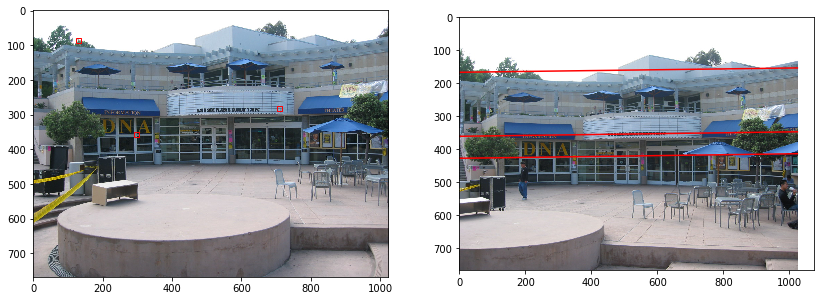

In [360]:





plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)

w = 15

for i in range(outlpts1.shape[1]):
    x1,y1 = outlpts1[:,i]
    x2,y2 = outlpts2[:,i]
    #ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill = False, color = 'r'))
    
    
    k = Edge_pts[0,i]
    b = Edge_pts[1,i]
    x = np.linspace(0, I2.shape[1])
    y = k *x +b
    ax2.plot(x,y,'-r')
    #ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()




## Problem 8 (Programming): Projective to Euclidean Reconstruction (15 points)

You are given a Matlab file containing points obtained from applying three-view geometry techniques (using the trifocal tensor) to obtain a projective reconstruction of points from a 3D scene. Also in the file are groundtruth control points. Compute the homography transformation using the DLT along with the projected 3D scene points and control points to upgrade the projective reconstruction to a Euclidean reconstruction. Render the scene, and comment on your results. What does the scene look like? (You may have to rotate the plot to get a better view.)


In [357]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio

reconstruction = sio.loadmat('ereconstruction.mat')
X_projective = reconstruction['X_projective']    # homo 3d 4*10000
X_projective = X_projective.T
X_control = reconstruction['X_c']
X_control = X_control.T     #  homo 3d 4*6 
X_DLT = X_projective[:,:6]

In [361]:
def left_null_calculator(x):
    #x - homo W scale  4*1   ----> 
    #Hv Household matrix
    #v Household matrix 
    #X_left      3*4n
    x_left = np.zeros((x.shape[0]-1,x.shape[0]*x.shape[1]))
    e = np.zeros((x.shape[0],1))
    e[0] = 1
    for i in range (x.shape[1]):
        sign = np.sign(x[0,i])
        v = x[:,i].reshape(-1,1) + sign * np.linalg.norm(x[:,i]) *e 
        Hv = np.eye((x.shape[0])) -2 * np.dot(v,v.T)/np.dot(v.T,v)
        x_left[:,i*x.shape[0]:(i+1)*x.shape[0]] = Hv[1:,:]
    return x_left

In [400]:
def ComputeHomography(Xp, Xc):
    """your code here"""
    Xc = Dehomogenize(Xc)
    Xp = Dehomogenize(Xp)
    
    Xc, T = Normalize(Xc)
    Xp, U = Normalize(Xp)
    
    """your code here"""
    x_left = left_null_calculator(Xc)
    A = np.zeros((3*Xc.shape[1],16))
    for i in range (Xc.shape[1]):
        temp1 = x_left[:,i*Xc.shape[0]: (i+1)*Xc.shape[0]]
        #print('temp1:   ', temp1.shape)
        temp2 = Xp[:,i].T
        #print('temp2:   ', temp2.shape)
        A[3*i:3*i+3,:] = np.kron(temp1,temp2)
    u,s,vh = np.linalg.svd(A)
    H_bar = vh[-1,:]
    # per rows 
    H = H_bar.reshape(4,4)     
    
    # data denormalize

    H = np.linalg.inv(T) @ H @ U
    #P = P/np.linalg.norm(P)*np.sign(P[-1,-1])

    print(H)
    return H


P = ComputeHomography(X_DLT, X_control)


[[-5.48765664e-02  3.12035929e-03 -1.73086640e-03  7.19900184e-01]
 [-3.83378549e-03 -4.77178900e-02 -2.74414454e-03  1.02383068e+00]
 [-1.13059438e-04  1.24745032e-04 -5.22562474e-02  2.70268245e-02]
 [ 1.17328143e-05 -9.31248713e-06  3.89963821e-05  5.07101649e-01]]


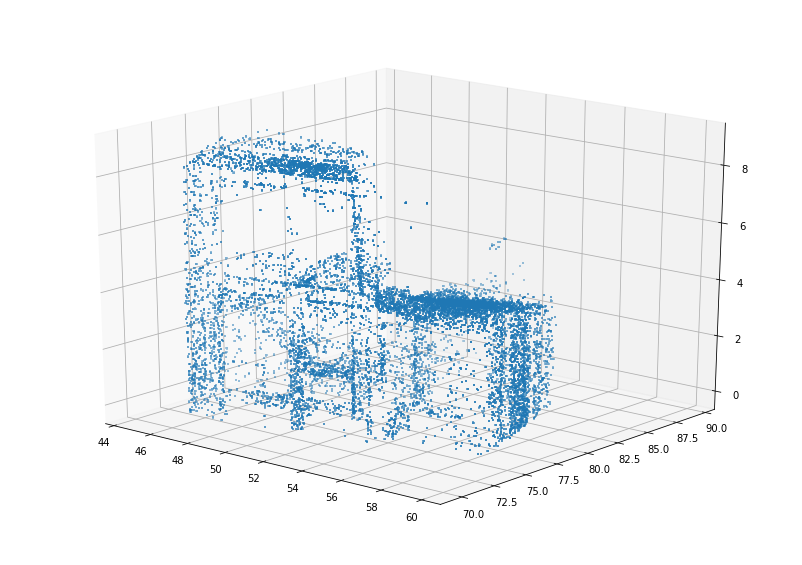

In [461]:
X_euclidean = Dehomogenize(P @ X_projective)
Xe, Ye, Ze = X_euclidean[0,:], X_euclidean[1,:], X_euclidean[2,:] 
fig = plt.figure(figsize=(14, 10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(Xe, Ye, Ze, marker="+", s=5)
axis.view_init(20,-50)
plt.show()

Look like a chair next to a small table. And there is a blanket cover over them :)